# Digital filters

## Ref

[Youtube](https://www.youtube.com/playlist?list=PLbqhA-NKGP6Afr_KbPUuy_yIBpPR4jzWo)  
[Stanford](https://ccrma.stanford.edu/~jos/filters/)  

## DSP

滤波器可以处理的最高频率是采样率的一半（奈奎斯特频率）

## Filters

### Feedforward filter - FIR filter

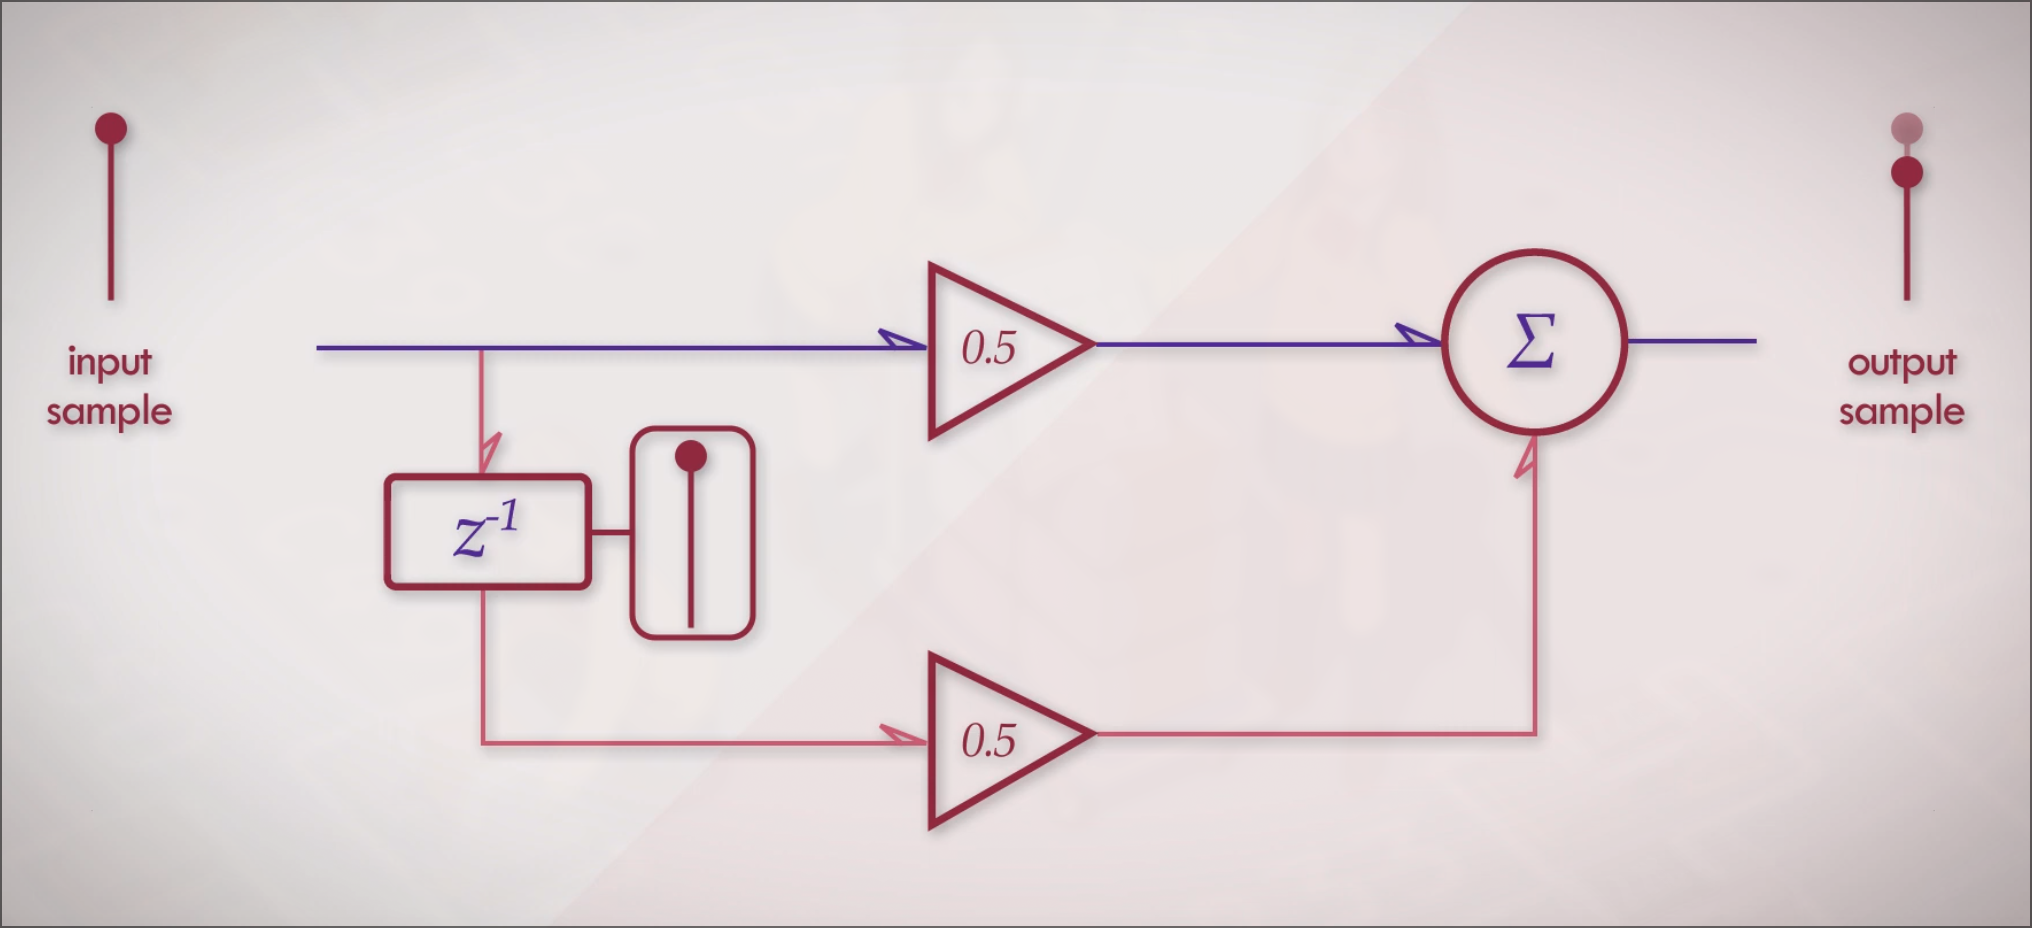

组成： 样本延时 $z^{-1}$ ，乘法器 $Mult$ ，加法器 $\Sigma$

时间涂抹量等于通过前馈分支的最大延时路径

延时模块引入了原信号的相移

在频谱内引入了零点

### Feedback filter - IIR filter

在频谱内引入了极点

### P - Z filter

在反馈滤波器内加入了前馈路径，同时引入了极点 `pole` 和零点 `zero` ，所以被称为 P-Z filter。  
其仍然属于IIR滤波器的一种。  

由于是线性时不变系统，所以前馈和反馈路径可以调换，并且可以共用一个延时以减少计算开销。

### Biquad filter

在前馈和反馈路径共用一个延时模块的IIR滤波器上添加了一阶得到的滤波器。

### 模拟滤波器

一阶RC滤波器本质上是一个IIR滤波器

## 线性相位

线性相位 = 具有恒定的群延时

在信号处理中，"线性时不变系统" 和 "线性相位系统" 是两个具有不同含义的概念。他们的定义和特性如下：  

- 线性时不变系统（Linear Time-Invariant System，或称LTI）：具有线性和时间不变性的系统。线性意味着系统对任何输入信号的响应，等于这个输入信号的线性组合的相应反应的线性组合。时间不变性意味着如果输入信号延后了一段时间，那么输出信号也延后相同的时间。LTI系统的一个重要特性是它们的行为可以通过系统的脉冲响应或者频率响应（即传递函数）完全描述。
- 线性相位系统（Linear Phase System）：系统的频率响应或传递函数在相位上呈线性变化的系统。线性相位系统主要特点是各频率成分通过该系统时具有相同的群延迟，也就是说，所有频率的信号元素都同时到达。这点在很多应用中是很重要的，比如音频信号处理和图像处理，因为它可以防止相位畸变。  


## Comb filter example code

Zeros:  [-1.00000000e+00+0.j         -9.51056516e-01+0.30901699j
 -9.51056516e-01-0.30901699j -8.09016994e-01+0.58778525j
 -8.09016994e-01-0.58778525j -5.87785252e-01+0.80901699j
 -5.87785252e-01-0.80901699j -3.09016994e-01+0.95105652j
 -3.09016994e-01-0.95105652j -4.85722573e-17+1.j
 -4.85722573e-17-1.j          3.09016994e-01+0.95105652j
  3.09016994e-01-0.95105652j  5.87785252e-01+0.80901699j
  5.87785252e-01-0.80901699j  1.00000000e+00+0.j
  9.51056516e-01+0.30901699j  9.51056516e-01-0.30901699j
  8.09016994e-01+0.58778525j  8.09016994e-01-0.58778525j]
Poles:  [-0.9825209 +0.15561602j -0.9825209 -0.15561602j -0.88634491+0.45161529j
 -0.88634491-0.45161529j -0.7034073 +0.7034073j  -0.7034073 -0.7034073j
 -0.45161529+0.88634491j -0.45161529-0.88634491j -0.15561602+0.9825209j
 -0.15561602-0.9825209j   0.15561602+0.9825209j   0.15561602-0.9825209j
  0.45161529+0.88634491j  0.45161529-0.88634491j  0.7034073 +0.7034073j
  0.7034073 -0.7034073j   0.9825209 +0.15561602j  0.9825209 -0.15561

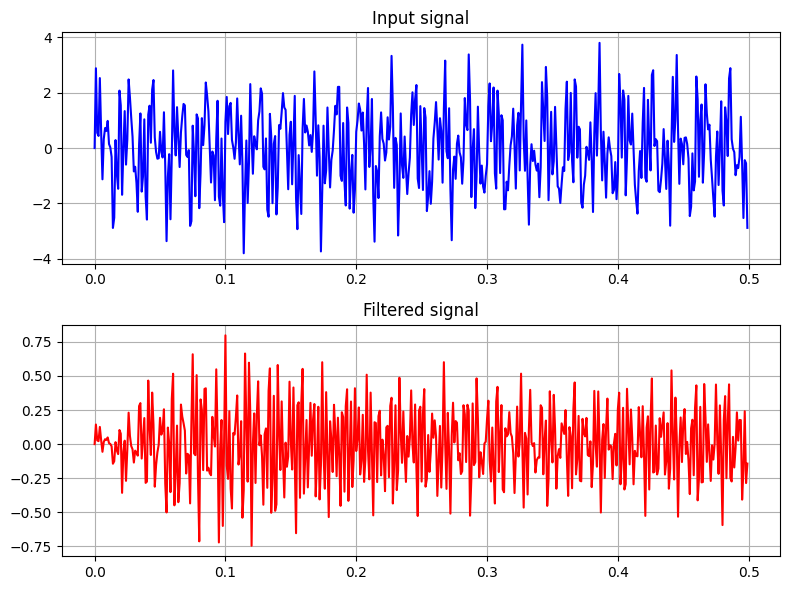

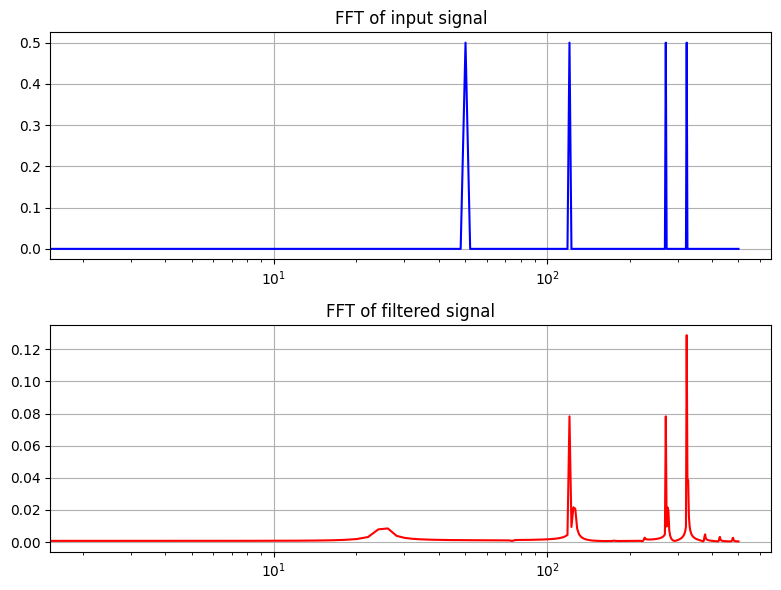

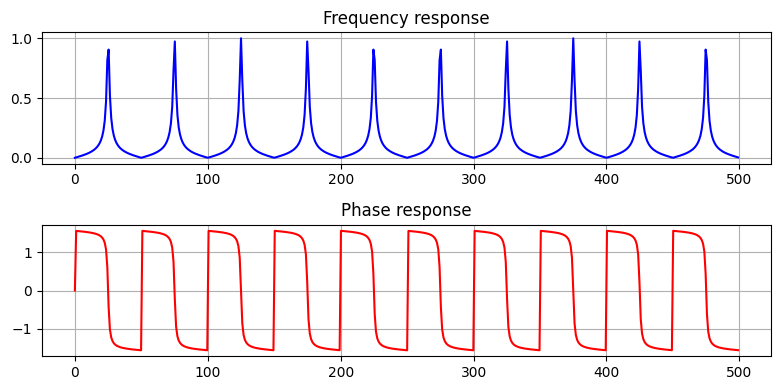

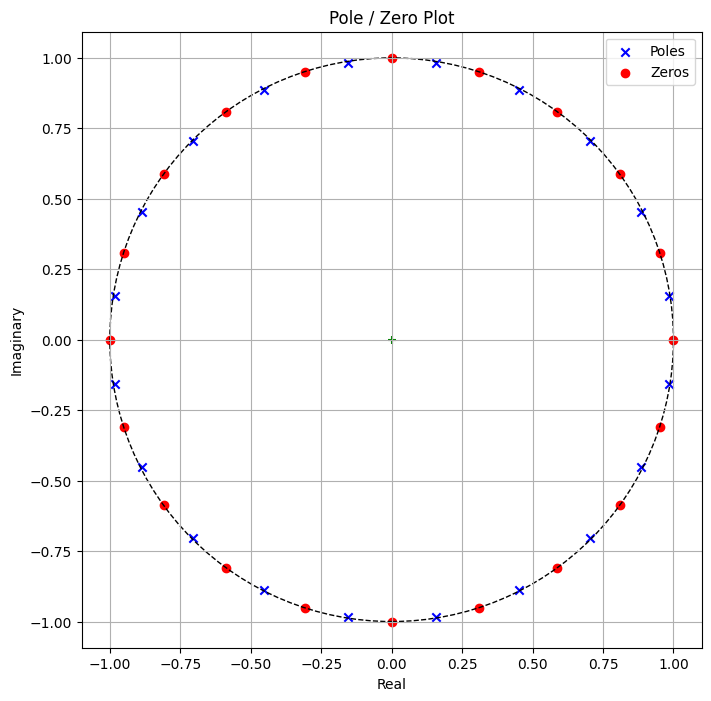

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.fft import fft

# Sampling rate and time vector
fs = 1000.0
t = np.arange(0, 0.5, 1/fs)

# Input signal
freqs = np.array([50.0, 120.0, 270.0, 322.0])
x = np.sin(2.0*np.pi*freqs[:,None]*t).sum(axis=0)
 
# Design filter
w0 = 50.0 # Frequency to be removed from signal (Hz)
Q = 30.0 # Quality factor
b, a = signal.iircomb(w0, Q, ftype='peak', fs=fs, pass_zero=False)

# Calculate Zeros, Poles & gain of the filter
zeros, poles, gain = signal.tf2zpk(b, a)
print('Zeros: ', zeros)
print('Poles: ', poles)
"""
print('Zeros: ', zeros)
for zero in zeros:
    print('Abs of Zero:',abs(zero))

print('Poles: ', poles)
for pole in poles:
    print('Abs of Pole:',abs(pole))
"""

print('Gain: ', gain)

# Frequency response
freq, h = signal.freqz(b, a, fs=fs)
amplitude = np.abs(h)
phase = np.angle(h)


# Apply filter
y = signal.lfilter(b, a, x)

# Normalized FFT
N = len(t)
fftx = (fft(x)/ len(t))[:N//2]
ffty = (fft(y)/ len(t))[:N//2]

frequencies = np.linspace(0, fs/2, len(fftx))

# Output to figures
plt.figure(figsize=(8, 6))

# Input signal
plt.subplot(2, 1, 1)
plt.plot(t, x, color='blue')
plt.grid()
plt.title('Input signal')

# Filtered signal
plt.subplot(2, 1, 2)
plt.plot(t, y, color='red')
plt.title('Filtered signal')
plt.grid()
plt.tight_layout()
plt.show()

# FFT of input signal
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
#plt.semilogx(t*fs, np.abs(fftx))

plt.semilogx(frequencies, np.abs(fftx),color='blue')
plt.grid()
plt.title('FFT of input signal')

# FFT of filtered signal
plt.subplot(2, 1, 2)
#plt.semilogx(t*fs, np.abs(ffty))
plt.semilogx(frequencies, np.abs(ffty),color='red')
plt.title('FFT of filtered signal')
plt.grid()
plt.tight_layout()
plt.show()

# Plot frequency and phase response
plt.figure(figsize=(8, 4))

plt.subplot(2, 1, 1)
plt.plot(freq, amplitude, color='blue')
plt.grid()
plt.title('Frequency response')

plt.subplot(2, 1, 2)
plt.plot(freq, phase, color='red')
plt.grid()
plt.title('Phase response')

plt.tight_layout()
plt.show()

# 极坐标图输出
plt.figure(figsize=(8,8))
plt.scatter(0, 0, marker='+', color='green')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='blue', label='Poles')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='red', label='Zeros')
# 参数(0,0)代表圆心坐标，1代表半径

circle = plt.Circle((0, 0), 1, fill = False, linestyle='dashed')
plt.gca().add_patch(circle)

plt.title('Pole / Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

plt.grid()
plt.axis('equal') # equal scaling in both x and y
plt.show()